# Brain Age Prediction SVR Lineal

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:
from sklearn.svm import SVR
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class SVRRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="SVR"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = SVR
        if params is None:
            self.params = {
                'kernel': 'rbf',
                'C': 1.0,
                'epsilon': 0.1,
                'gamma': 'scale'
            }
        if params_space is None:
            self.params_space = {
                'C': Real(0.01, 10.0, prior='log-uniform'),
                'gamma': Real(0.01, 10.0, prior='log-uniform'),
                'epsilon': Real(0.001, 1.0),
                'kernel': ['linear']
            }

c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = SVRRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'magenta'
nameset = 'SVR'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [6]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [8]:
with open(f'results_model/opt_model.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [7]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

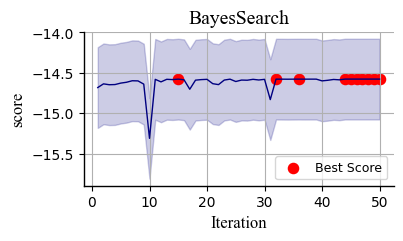

Top 1: Iteration 49, Score -14.57743572079533
Top 2: Iteration 47, Score -14.577455375225455
Top 3: Iteration 46, Score -14.577462688682605
Top 4: Iteration 45, Score -14.577499022310993
Top 5: Iteration 44, Score -14.577542798290608
Top 6: Iteration 48, Score -14.577559010283414
Top 7: Iteration 50, Score -14.577641414493135
Top 8: Iteration 36, Score -14.577947076094251
Top 9: Iteration 32, Score -14.578001354745984
Top 10: Iteration 15, Score -14.578075511450635


In [9]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [10]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'C': 0.6449944806188989, 'epsilon': 1.0, 'gamma': 10.0, 'kernel': 'linear'},
 {'C': 0.6450945804366087, 'epsilon': 1.0, 'gamma': 10.0, 'kernel': 'linear'},
 {'C': 0.6451067449349733, 'epsilon': 1.0, 'gamma': 10.0, 'kernel': 'linear'},
 {'C': 0.6457186226774866,
  'epsilon': 1.0,
  'gamma': 4.395184905873788,
  'kernel': 'linear'},
 {'C': 0.64578528835313,
  'epsilon': 1.0,
  'gamma': 3.262767378161769,
  'kernel': 'linear'},
 {'C': 0.6465603035075655,
  'epsilon': 1.0,
  'gamma': 0.8552096774234869,
  'kernel': 'linear'},
 {'C': 0.6469939675493943,
  'epsilon': 1.0,
  'gamma': 0.6625283005831427,
  'kernel': 'linear'},
 {'C': 0.6287709288194788, 'epsilon': 1.0, 'gamma': 0.01, 'kernel': 'linear'},
 {'C': 0.652306554674619, 'epsilon': 1.0, 'gamma': 0.01, 'kernel': 'linear'},
 {'C': 0.6275764445712558, 'epsilon': 1.0, 'gamma': 10.0, 'kernel': 'linear'}]

In [11]:
best_params=opt_model.best_params_

# Training

In [12]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [14]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [15]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [16]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.06e-89
Time:                        13:33:22   Log-Likelihood:                -5207.1
No. Observations:                1323   AIC:                         1.042e+04
Df Residuals:                    1321   BIC:                         1.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3932      0.861     35.314      0.0

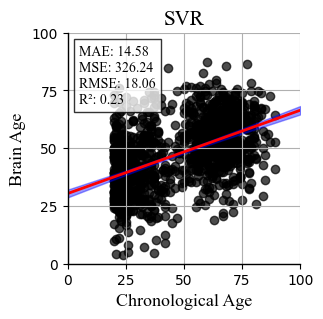

Error medio absoluto: 14.580219599637154
Error cuadrático medio: 326.236636171811
Raíz del error cuadrático medio: 18.06202192922517
Coeficiente de determinación (R²): 0.22725971664151612


In [16]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     3442.
Date:                Fri, 14 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:33:26   Log-Likelihood:                -5208.2
No. Observations:                1323   AIC:                         1.042e+04
Df Residuals:                    1321   BIC:                         1.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2129      0.861      1.408      0.1

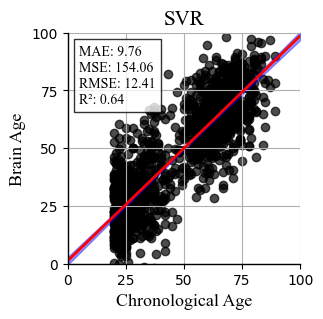

Error medio absoluto: 9.760426429319166
Error cuadrático medio: 154.05621459806832
Raíz del error cuadrático medio: 12.41193839003676
Coeficiente de determinación (R²): 0.6350948062775146


In [17]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [19]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_CING_left: 5727.769894521467
IAF_OCC_right: 4933.082840474186
Low_subj_spec_RPD_OCC_left: 4454.445769058011
Low_subj_spec_EPP_PARIET_left: 4234.459825241247
Low_subj_spec_RPD_CING_right: 4144.447290888467
TF_MFG_right: 3864.5428638092126
IAF_IFG_right: 3798.3049529982613
IAF_OCC_left: 3670.6016438008287
Low_subj_spec_EPP_HPC_left: 3306.6517851514213
IAF_ORB_right: 3296.397433232535
IAF_HPC_right: 3055.5080885589637
IAF_INS_right: 2746.699489441389
Low_subj_spec_RPD_CING_left: 2644.7037058469978
Alpha2_canon_EPP_OCC_left: 2642.3681763009504
Alpha2_canon_RPD_OCC_left: 2642.3681763001746
TF_SFG_right: 2481.1338350023334
TF_ORB_left: 2305.8791152674207
TF_SFG_left: 2165.8417906534946
TF_INS_left: 2068.342236805369
Low_subj_spec_EPP_OCC_right: 1903.4026517742734
IAF_ORB_left: 1865.2597259654544
Low_subj_spec_EPP_OCC_left: 1846.9483996984013
Low_subj_spec_RPD_HPC_right: 1715.7613415179283
High_subj_spec_EPP_HPC_

In [21]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/multiple_shap_values_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_avg_CN, f)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [22]:
shap_summary_sorted_CN

[('Low_subj_spec_EPP_CING_left', 5727.769894521467),
 ('IAF_OCC_right', 4933.082840474186),
 ('Low_subj_spec_RPD_OCC_left', 4454.445769058011),
 ('Low_subj_spec_EPP_PARIET_left', 4234.459825241247),
 ('Low_subj_spec_RPD_CING_right', 4144.447290888467),
 ('TF_MFG_right', 3864.5428638092126),
 ('IAF_IFG_right', 3798.3049529982613),
 ('IAF_OCC_left', 3670.6016438008287),
 ('Low_subj_spec_EPP_HPC_left', 3306.6517851514213),
 ('IAF_ORB_right', 3296.397433232535),
 ('IAF_HPC_right', 3055.5080885589637),
 ('IAF_INS_right', 2746.699489441389),
 ('Low_subj_spec_RPD_CING_left', 2644.7037058469978),
 ('Alpha2_canon_EPP_OCC_left', 2642.3681763009504),
 ('Alpha2_canon_RPD_OCC_left', 2642.3681763001746),
 ('TF_SFG_right', 2481.1338350023334),
 ('TF_ORB_left', 2305.8791152674207),
 ('TF_SFG_left', 2165.8417906534946),
 ('TF_INS_left', 2068.342236805369),
 ('Low_subj_spec_EPP_OCC_right', 1903.4026517742734),
 ('IAF_ORB_left', 1865.2597259654544),
 ('Low_subj_spec_EPP_OCC_left', 1846.9483996984013),
 (

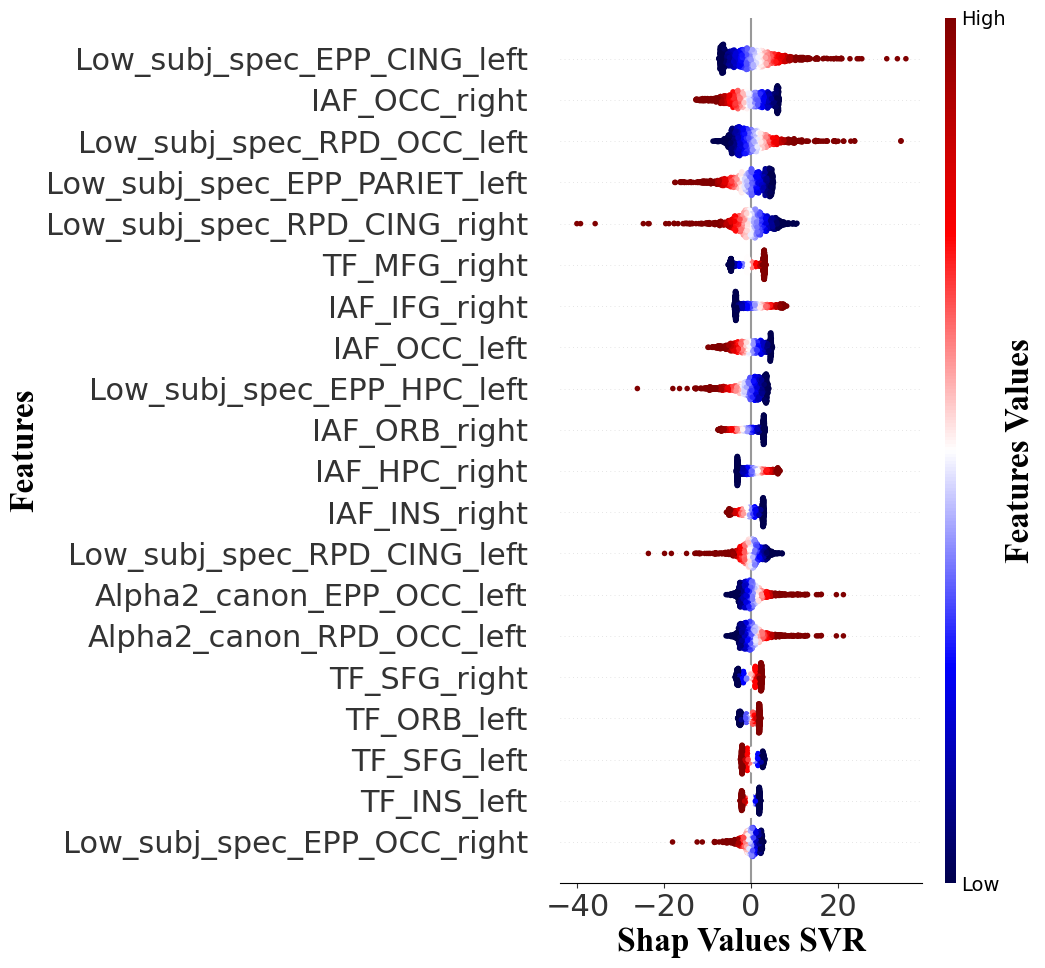

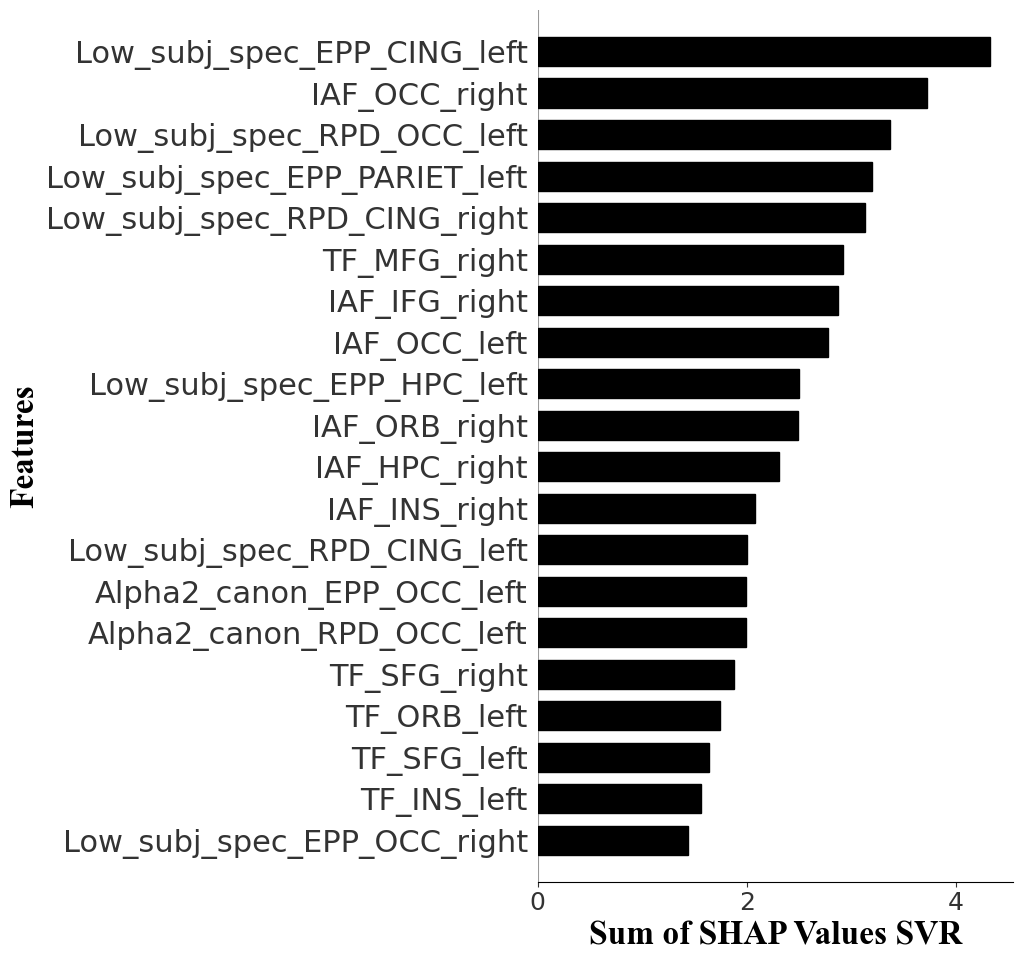

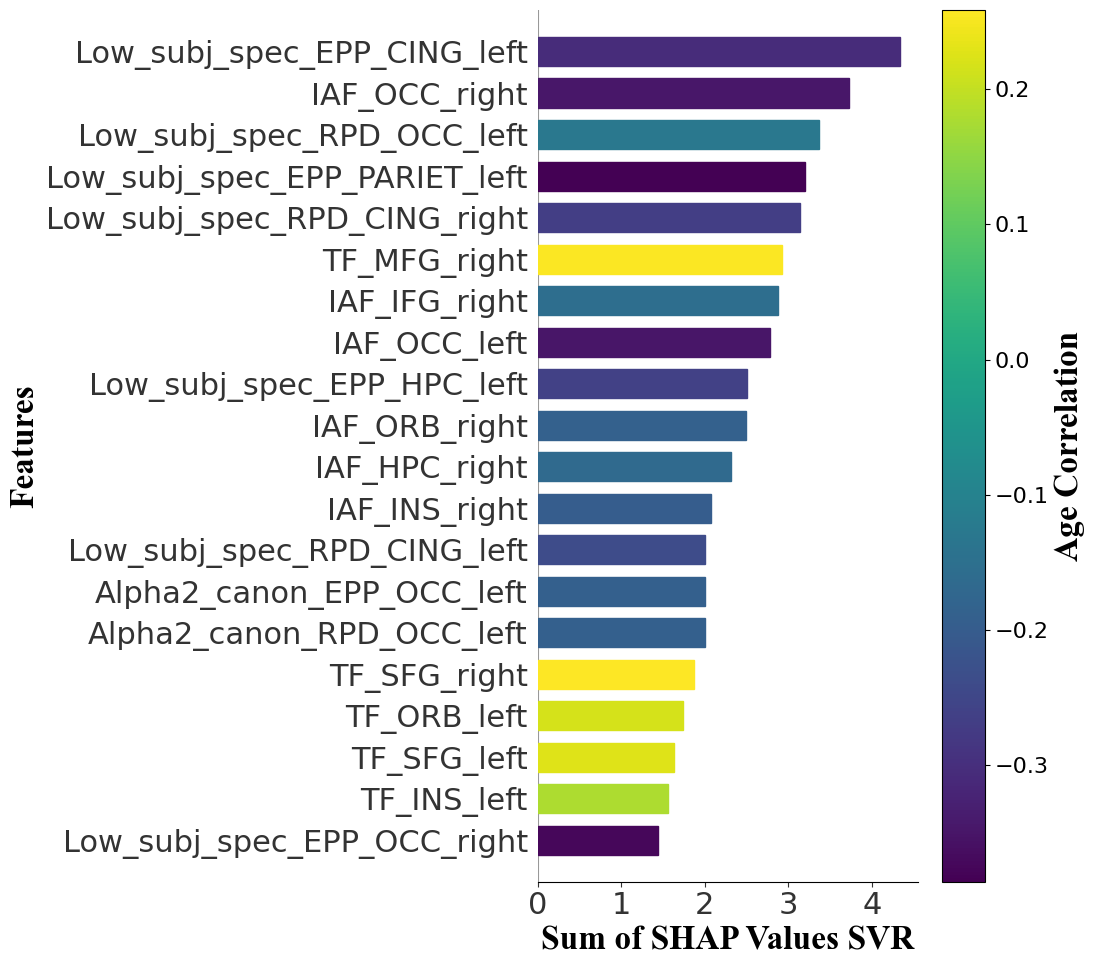

In [23]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [24]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

OCC_left: 1.000000
CING_left: 0.704952
OCC_right: 0.607145
PARIET_left: 0.521161
CING_right: 0.510083
MFG_right: 0.475633
IFG_right: 0.467481
HPC_left: 0.406970
ORB_right: 0.405708


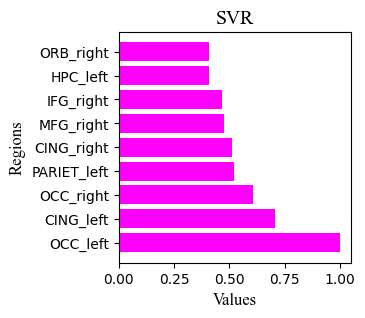

In [25]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


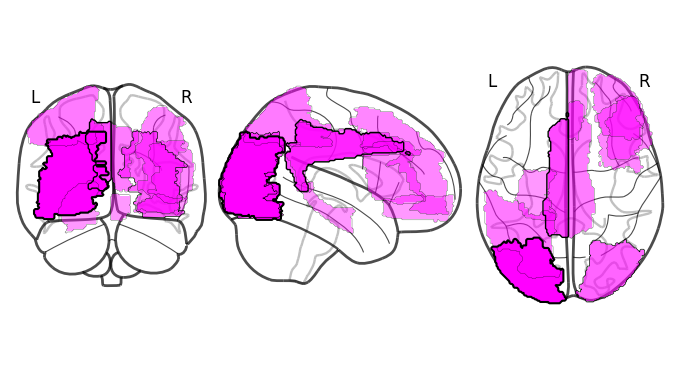

In [26]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)